# <font color=darkbrown> FORECASTING ASSIGNMENT. </font><br>
## <font color=red> PROBLEM STATEMENT. </font>
#### Forecast the CocaCola prices.<br>Prepare a document for each model.<br>Explaining, how many dummy variables you have created and RMSE value for each model.<br><Br>Finally which model you will use for Forecasting.<br>


# <font color= red> EDA AND VISUALIZATION.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [28]:
forecast = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
forecast

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [29]:
forecast.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

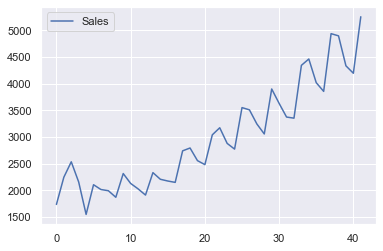

In [30]:
forecast.plot()

<AxesSubplot:>

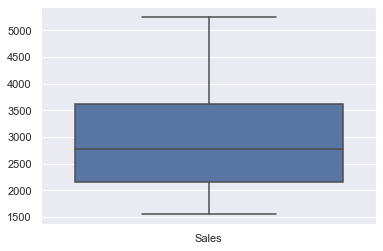

In [31]:
import seaborn as  sns
sns.boxplot(data = forecast)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

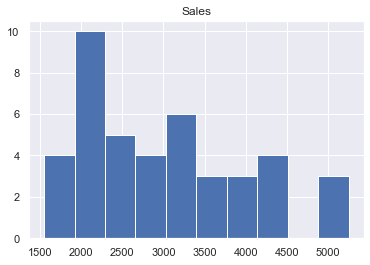

In [32]:
forecast.hist()

<AxesSubplot:ylabel='Density'>

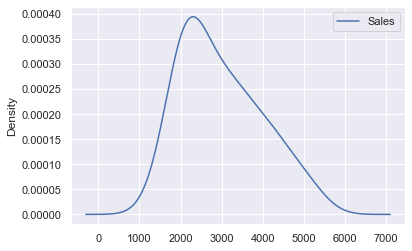

In [33]:
forecast.plot(kind="kde")

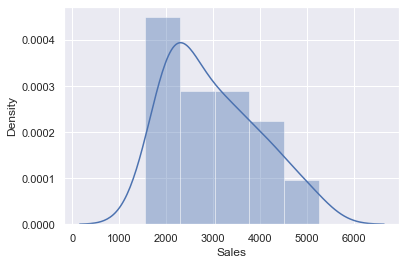

In [34]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(forecast['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

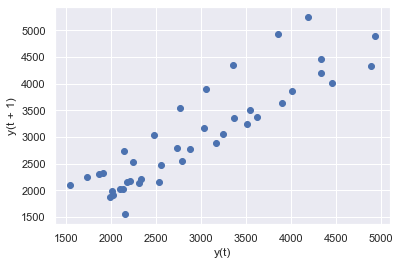

In [35]:
from pandas.plotting import lag_plot
lag_plot(forecast['Sales'])

# <font color= red> DATA PREPROCESSING. </font><br>
## <font color= red> FEATURE ENGINEERING.</font>
### Converting the Quarters into Years.

In [36]:
forecast['Quarter_Year'] = forecast['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
forecast.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


### Now, Converting Quarter Years Into Quarter (Date Month and Year).

In [37]:
# converting into datetime formate as the index was not in correct formate.

forecast['Date'] = (
    pd.to_datetime(
        forecast['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
    ,dayfirst=True))
forecast.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


### Separating Month and Year into Separate Column for Visualization.

In [38]:
forecast["Date"] = pd.to_datetime(forecast.Date,format="%b-%y")
forecast["month"] = forecast.Date.dt.strftime("%b") # month extraction
forecast["year"] = forecast.Date.dt.strftime("%Y") # year extraction
forecast.head(10)

,Quarter,Sales,Quarter_Year,Date,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Apr,1988


### Making the Date as DateTime index for the Dataframe.

In [39]:
forecast.set_index('Date',inplace=True)
forecast.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [19]:
forecast1 = forecast.drop(["Quarter","Quarter_Year"], axis=1)
forecast1.head()

,Sales,month,year
Date,,,
1986-01-01,1734.827000,Jan,1986
1986-04-01,2244.960999,Apr,1986
1986-07-01,2533.804993,Jul,1986
1986-10-01,2154.962997,Oct,1986
1987-01-01,1547.818996,Jan,1987


## <font color= red> ACF AND PACF PLOTS.</font>

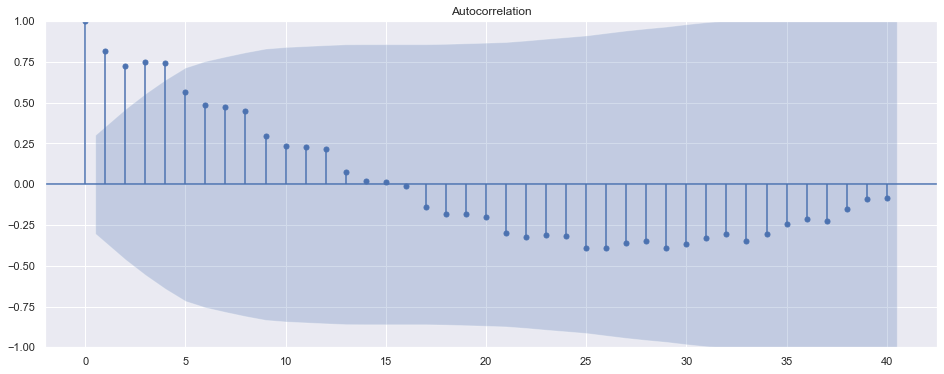

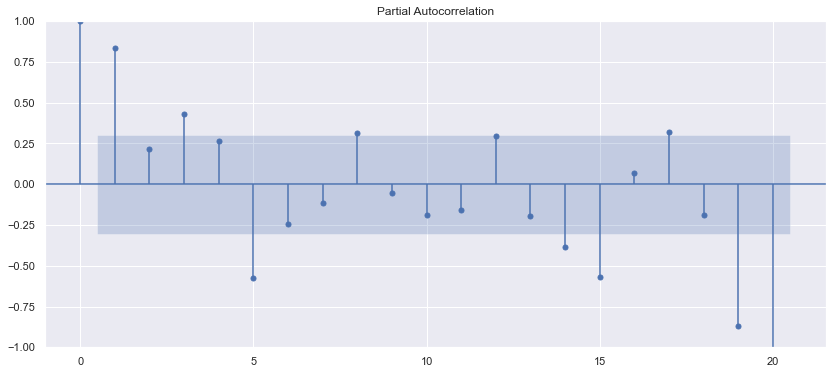

In [40]:
import statsmodels.graphics.tsaplots as tsa_plots

# ACF PLOT:- 

with plt.rc_context():
    plt.rc("figure", figsize=(16,6))
    tsa_plots.plot_acf(forecast1['Sales'],lags=40)
    plt.show()
# PACF PPLOT:- 

with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(forecast1.Sales,lags=20)
    plt.show()

## <font color= red> SAMPLING THE DATA.</font>
#### INTERPOLATION (Upsampling With Respect To Month).

In [41]:
upsampled_month = forecast1.resample('M').mean()
upsampled_month.head()

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,2244.960999
1986-05-31,NaN


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997


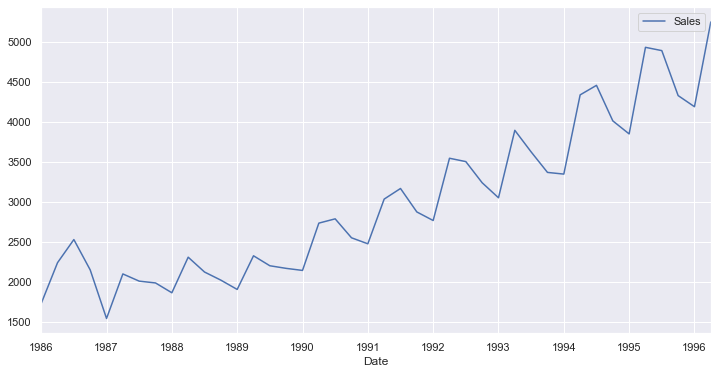

In [42]:
## interpolation was done for nan values which we get after doing upsampling by month
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(10))

interpolated_month.plot(figsize=(12,6))
plt.show()

In [43]:
interpolated_month.reset_index(inplace=True)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
forecast3 = interpolated_month
forecast3

,Date,Sales,month
0,1986-01-31,1734.827000,Jan
1,1986-02-28,1904.871666,Feb
2,1986-03-31,2074.916332,Mar
3,1986-04-30,2244.960999,Apr
4,1986-05-31,2341.242330,May
...,...,...,...
119,1995-12-31,4240.333333,Dec
120,1996-01-31,4194.000000,Jan
121,1996-02-29,4547.000000,Feb
122,1996-03-31,4900.000000,Mar


### Log Transformation On Dependent Variable Column. 

In [47]:
forecast3["Sales_log"] = np.log(forecast3['Sales'])
forecast3["Sales_sqrt"] = np.sqrt(forecast3['Sales'])

In [49]:
#Also adding "t" col and "t_squared" columns.
forecast3['t'] = np.arange(1,125)
forecast3['t_squared'] = forecast3['t']**2

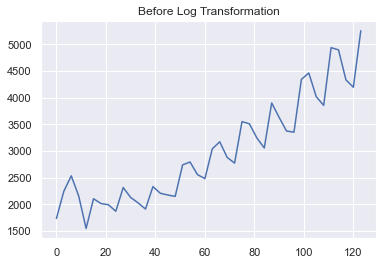

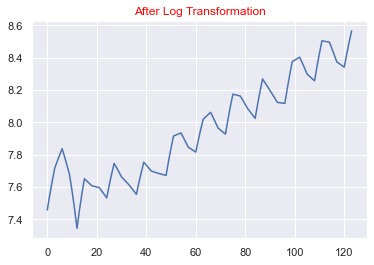

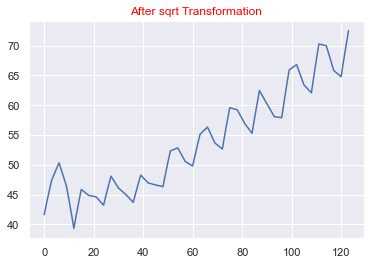

In [51]:
# BEFORE TRANSFORMATION.
interpolated_month['Sales'].plot()
plt.title("Before Log Transformation")
plt.show()

# AFTER TRANSFORMATION.
interpolated_month['Sales_log'].plot()
plt.title("After Log Transformation",color = "red")
plt.show()
interpolated_month['Sales_sqrt'].plot()
plt.title("After sqrt Transformation",color = "red")
plt.show()

In [52]:
forecast3.shape

(124, 7)

## <font color= red> DATA SPLITTING.</font>

In [54]:
#70% of data into Train data and rest for Test Data.

size = 100

Train = forecast3.iloc[:size]
Test = forecast3.iloc[size:]

## <font color= red>  MODEL BUILDING .</font>
### <font color= green>1) Linear Model.</font>

In [55]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  linear_model.predict(pd.DataFrame(Test['t']))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668945

### <font color= green>2) Quadratic Model.</font>

In [56]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = Quad.predict(Test[["t","t_squared"]])
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

371.2941834498652

### <font color= green>3) Exponential Model.</font>

In [57]:
Exp = smf.ols('Sales_log~t',data=Train).fit()
pred_Exp = Exp.predict(pd.DataFrame(Test['t']))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

530.3268025099092

### <font color= green>4) Additive Seasonality Model.</font>

In [58]:
add_sea = smf.ols('Sales~month',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483782

### <font color= green>5) Additive Seasonality Quadratic Model.</font>

In [59]:

add_sea_Quad = smf.ols('Sales~t+month',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

613.8258293118381

### <font color= green>6) Multiplicative Seasonality Model.</font>

In [60]:
Mul_sea = smf.ols('Sales_log~month',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1904.7944171920255

### <font color= green>7) Multiplicative Additive Seasonality  Model.</font>

In [61]:
Mul_Add_sea = smf.ols('Sales_log~t+month',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

396.4197817376186

### <font color= green>8) ARIMA Model.</font>
#### <font color= green>STEP 1.</font>

In [62]:
forecast3.set_index('Date',inplace=True)
forecast3.index.year

Int64Index([1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
            ...
            1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996],
           dtype='int64', name='Date', length=124)

In [63]:
forecast3.head()

,Sales,month,Sales_log,Sales_sqrt,t,t_squared
Date,,,,,,
1986-01-31,1734.827000,Jan,7.458663,41.651254,1,1
1986-02-28,1904.871666,Feb,7.552170,43.644836,2,4
1986-03-31,2074.916332,Mar,7.637676,45.551250,3,9
1986-04-30,2244.960999,Apr,7.716443,47.381019,4,16
1986-05-31,2341.242330,May,7.758437,48.386386,5,25


In [66]:
# Droping the not required columns.

Forecast = forecast3.drop(["Sales_log","Sales_sqrt","t","t_squared","month"], axis=1)
Forecast.head(4)

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999


#### <font color= green>STEP 2.</font>
#### <font color= darkgreen> MAKING THE DATASET STATIONARY.</font>

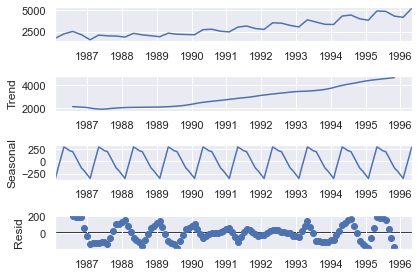

In [69]:
# Decompose Time-Series to See Components (Trend, Seasonality, Noise, etc).

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(Forecast)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

##### <font color= red> STEP1:- Checking Whether Time-Series is Stationary or Not. .</font>

### Dicky-Fuller Test for Stationarity.
#### Once we have removed trend and seasonality from time-series data then we can test its stationarity using a dicky-fuller test. It's a statistical test to check the stationarity of time-series data.

In [83]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(Forecast, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.5725994512262168
2. P-Value :  0.9869204153832035
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 113
5. Critical Values :
	 1% :  -3.489589552580676
	 5% :  -2.887477210140433
	 10% :  -2.580604145195395


#### We can interpret above results based on p-values of result.<br><br><br>p-value > 0.05 - This implies that time-series is non-stationary.<br>p-value <=0.05 - This implies that time-series is stationary.<br><br>We can see from the above results that p-value is greater than 0.05, hence our time-series is not stationary. It still has time-dependent components present which we need to remove.

##### <font color= red> STEP2:- REMOVING TRENDS AND SEASONALITY. .</font>

#### We can make the dataset stationary by removing trend and seasonality from time series data.<br><br>a} There are various ways to remove trend are as follow:-<br>1)Log Transformation.<br>2)Power Transformation.<br>3)Local smoothing - Applying moving window functions to time-series data<br>Differencing a time-series.<br>Linear Regression,etc.
#### <font color= green> OR We can directly do detrending by using the detrend function from the scipy module.</font>
#### b}There are various ways to remove seasonality are as follow:-<br>1)Average de-trended values.<br>2)Differencing a time-series.<br>3)Use the loss method,etc.
#### <font color= green>OR We can directly use the "seasonal_decompose" function from the "statsmodels" package.</font>

### Removing Trend By Log Transformation.

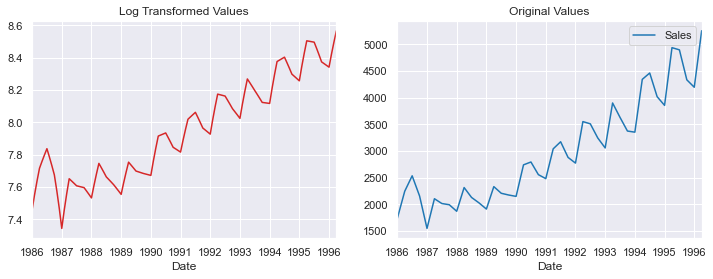

In [73]:
logged_Forecast = Forecast["Sales"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_Forecast.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
Forecast.plot(color="tab:blue", title="Original Values", ax=ax2);

### Now, Removing Seasonality By Differencing Over Log Transformed Time-Series.

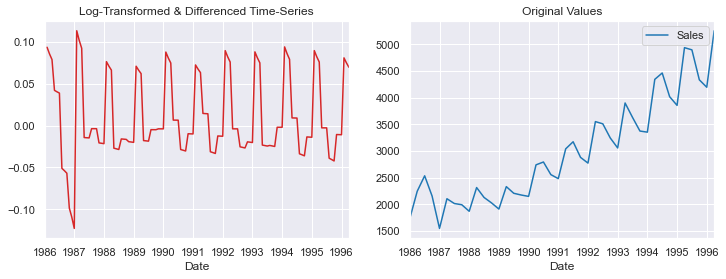

In [74]:
logged_Forecast_diff = logged_Forecast - logged_Forecast.shift()

ax1 = plt.subplot(121)
logged_Forecast_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
Forecast.plot(figsize=(12,4), color="tab:blue", title="Original Values", ax=ax2);

##### <font color= red> STEP3:- AGAIN CHECK WEATHER THE DATASET IS STATIONARY OR NOT. .</font>

In [84]:
# Dicky-Fuller Test For Checking Dataset Is Stationarity Or Not.

dftest = adfuller(logged_Forecast_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.030060213253419
2. P-Value :  0.03218092739693495
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 110
5. Critical Values :
	 1% :  -3.4912451337340342
	 5% :  -2.8881954545454547
	 10% :  -2.5809876033057852


#### We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above. 

### <font color= green> From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.03 less than 0.05.</font>

#### <font color= green>STEP 3.</font>
#### <font color= darkgreen>Splitting the dataset.</font>

In [87]:
Forecast = logged_Forecast_diff

#### <font color= darkgreen>ARIMA on the Data with UpSampling..</font>

In [88]:
# separate out a validation dataset

train_data = Forecast[:100]
test_data = Forecast[100:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))
train_data.to_csv('Forecast_train.csv', header=False)
test_data.to_csv('Forecast_validation.csv', header=False)

Dataset 100, Validation 24


#### <font color= darkgreen>ARIMA on the Original Data without UpSampling.</font>

In [89]:
forecast1.head()

,Sales,month,year
Date,,,
1986-01-01,1734.827000,Jan,1986
1986-04-01,2244.960999,Apr,1986
1986-07-01,2533.804993,Jul,1986
1986-10-01,2154.962997,Oct,1986
1987-01-01,1547.818996,Jan,1987


In [91]:
Forecast1 = forecast1.drop(["month","year"], axis=1)
Forecast1.shape

(42, 1)

In [92]:
# separate out a validation dataset

size = int(np.round(len(Forecast1)*0.70,))

forecast_train = Forecast1.Sales[:size]
forecast_validation = Forecast1.Sales[size:]
print('Dataset %d, Validation %d' % (len(forecast_train), len(forecast_validation)))
forecast_train.to_csv('forecast_train.csv', header=False)
forecast_validation.to_csv('forecast_validation.csv', header=False)

Dataset 29, Validation 13


#### <font color= green>STEP 4.</font>
#### <font color= darkgreen>ARIMA Hyperparameter Tuning.</font>

In [93]:
# grid search ARIMA parameters for a time series:-
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE:-

from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [95]:
# evaluate combinations of p, d and q values for an ARIMA model:- 


def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [96]:
# load dataset
train = pd.read_csv('forecast_train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train = train.astype('int64')
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMA(2, 2, 1) RMSE=262.643


## <font color= red> FINAL MODEL.</font>

In [98]:
# separate out a validation dataset
size = int(np.round(len(forecast_train)*0.70,))

train_data = forecast_train[:size]
test_data = forecast_train[size:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))

Dataset 20, Validation 9


In [99]:
model = ARIMA(train_data,order=(2, 2, 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   20
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -130.551
Date:                Thu, 29 Sep 2022   AIC                            269.102
Time:                        23:52:11   BIC                            272.664
Sample:                    01-01-1986   HQIC                           269.593
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2319      0.282     -0.822      0.411      -0.785       0.321
ar.L2         -0.4218      0.444     -0.949      0.342      -1.292       0.449
ma.L1         -1.0000      0.501     -1.998      0.046      -1.981      -0.019
sigma2      8.586e+04   5.83e-06   1.47e+10      0.000    8.59e+04    8.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.76   Prob(JB):                         0.90
Heteroskedasticity (H):               0.33   Skew:                            -0.26
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.42e+25. Standard errors may be unstable.
"""

## <font color= red> USE MODEL TO PREDICT.</font>

In [103]:
# Obtain predicted values
start=len(train_data)
end=len(forecast_train)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(2,2,1) Predictions')

In [118]:
# Compare predictions to expected values
for i in range(len(test_data)):
    print(f"predicted={predictions[i]:<.10}, expected={test_data[i]}")

predicted=2655.862817, expected=2480.9739990234375
predicted=2800.047805, expected=3039.522994995117
predicted=2791.987866, expected=3172.115997314453
predicted=2800.536935, expected=2879.0009994506836
predicted=2869.445491, expected=2772.0
predicted=2917.3512, expected=3550.0
predicted=2944.670236, expected=3508.0
predicted=2985.621683, expected=3243.859992980957
predicted=3032.094369, expected=3056.0


## <font color= red> MODEL EVALUATION.</font>
#### RMSE (Root Mean Squared Error)

In [119]:
from statsmodels.tools.eval_measures import rmse

rmse_arima = rmse(test_data, predictions)
rmse_arima.round(2)

338.78

## <font color= red> VALIDATION.</font>

In [120]:
#Compare the results 

data = {"MODEL":pd.Series(["Linear Model","Expotential Model","Quadratic Model","Additive Seasonality Model","Additive Seasonality Quadratic Model",
                           "Multiplicative Seasonality Model","Multiplicative Additive Seasonality Model","ARIMA_Model"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_arima])} 
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,ARIMA_Model,338.776807
2,Quadratic Model,371.294183
6,Multiplicative Additive Seasonality Model,396.419782
1,Expotential Model,530.326803
4,Additive Seasonality Quadratic Model,613.825829
0,Linear Model,686.874086
3,Additive Seasonality Model,1837.787972
5,Multiplicative Seasonality Model,1904.794417
